In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

In [2]:
vix = pd.read_csv ('../../dataset/Indicators/vix.csv', encoding='unicode_escape')

In [3]:
vix.head()

,time,close
0,1990-01-03T09:10:00+01:00,18.19
1,1990-01-04T09:10:00+01:00,19.22
2,1990-01-05T09:10:00+01:00,20.11
3,1990-01-08T09:10:00+01:00,20.26
4,1990-01-09T09:10:00+01:00,22.20


In [5]:
def cleaned_indicator(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    return df

In [6]:
vix = cleaned_indicator(vix)

In [14]:
def vix_visualization():
    plt.plot(vix, color= 'b')
    plt.title('Volatility Index', fontsize= 20)
    plt.xlabel('Years', fontsize= 20)
    plt.ylabel('VIX', fontsize= 20)
    plt.style.use('seaborn')
    return plt.show()

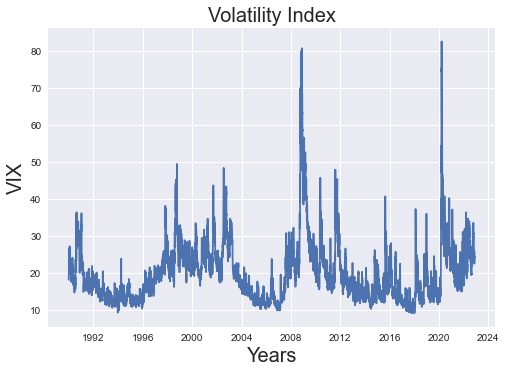

In [15]:
vix_visualization()